In [1]:
import pandas as pd
from pandas import Series,DataFrame

#import data
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#1: who were the passengers on the titanic?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

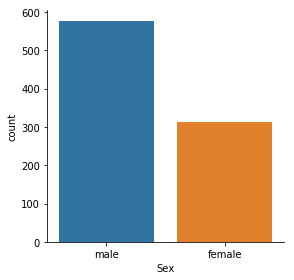

In [8]:
sns.factorplot(x='Sex',data=titanic_df,kind="count")

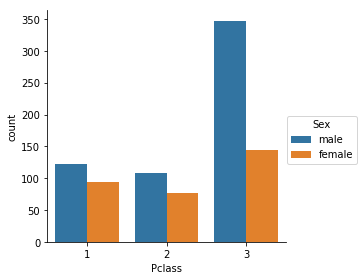

In [10]:
#seperate gender by classes
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind="count")
#much more males in the 3rd class than females

In [13]:
#split between males, females and children
#treat anyone as under 16 as child
def male_female_child(passenger):
    age,sex=passenger
    if age < 16:
        return 'child'
    else:
        return sex

#define a new column "person"
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


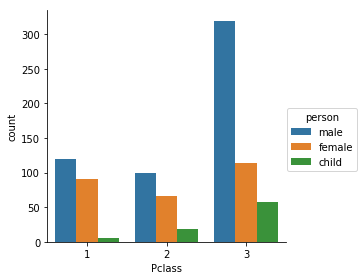

In [15]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind="count")
#number of children in 3rd class is more than in 1st

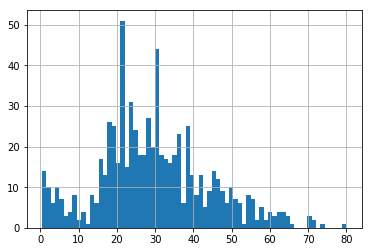

In [16]:
titanic_df['Age'].hist(bins=70)

In [17]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

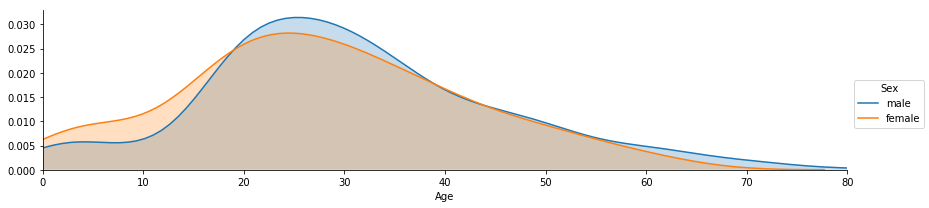

In [20]:
#visualize data using facetgrid to plot multiple kdeplots on one plot

#set the figure
fig=sns.FacetGrid(titanic_df,hue="Sex",aspect=4)

#plot all the possible kdeplots for the 'Age' column
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

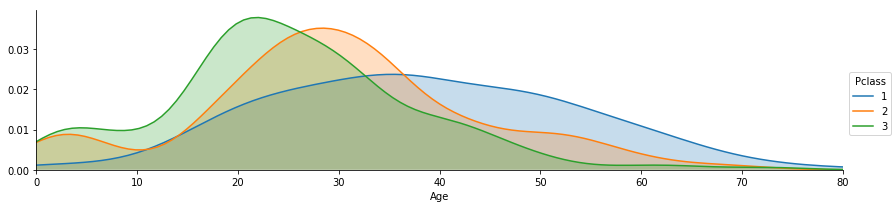

In [21]:
#plot all the possible kdeplots for the 'Pclass' column
fig=sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [22]:
#2: what deck were the passengers on, how this relate to their class

In [24]:
#drop nan from 'cabin' column and create new object 'deck'
deck=titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

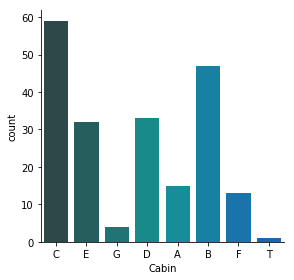

In [27]:
#grab first letter for deck level
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind="count")

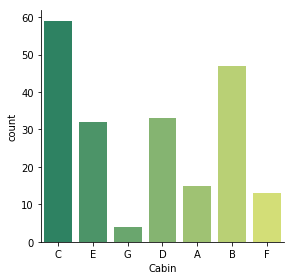

In [29]:
#drop T level
cabin_df=cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind="count")

In [30]:
#3: where did the passengers come from

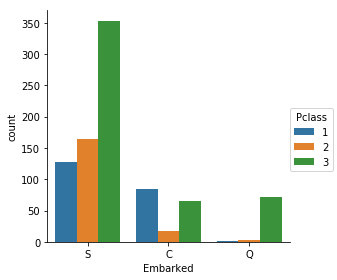

In [35]:
sns.factorplot(x='Embarked',data=titanic_df,hue='Pclass',row_order=['C','Q','S'],kind="count")
#in Queenstown, most passengers were 3rd class

In [36]:
#4: who was alone and who was with family

In [42]:
#define alone column
titanic_df['Alone']=titanic_df.Parch+titanic_df.SibSp
titanic_df['Alone'].loc[titanic_df['Alone'] > 0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0]='Alone'

/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


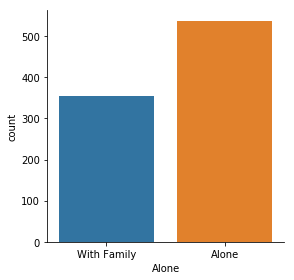

In [45]:
sns.factorplot('Alone',data=titanic_df,kind="count")

In [46]:
#5: what factors helped someone survive the sinking

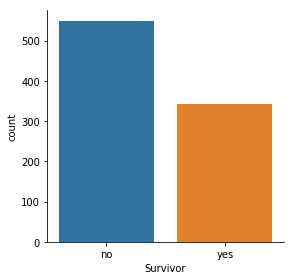

In [48]:
titanic_df["Survivor"]=titanic_df.Survived.map({0:"no", 1:"yes"})
sns.factorplot('Survivor',data=titanic_df,kind="count")

In [49]:
#movie shows that 3rd class behave worse than 1st and 2nd class counterparts

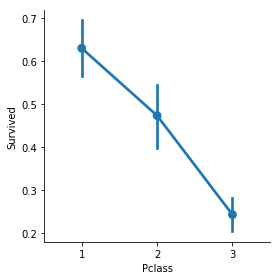

In [50]:
sns.factorplot('Pclass','Survived',data=titanic_df)
#much less survival rates for 3rd class. 
#is it because of male_female_child combination with women_child first policy?

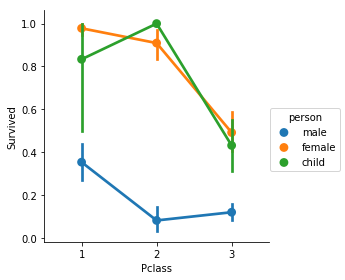

In [51]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)
#male or in 3rd class are factor cause death
#being a male in any class is not good for survival

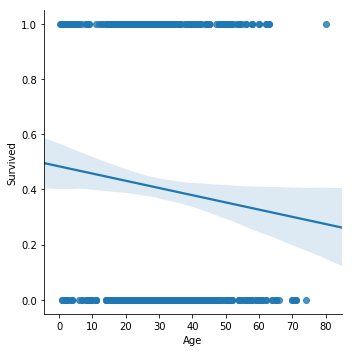

In [52]:
sns.lmplot('Age','Survived',data=titanic_df)
#older passenger was less likely to survive
#what about effects of class and age?

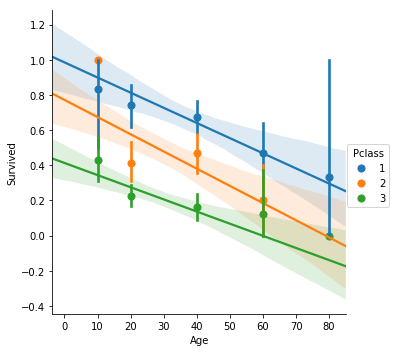

In [55]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations)

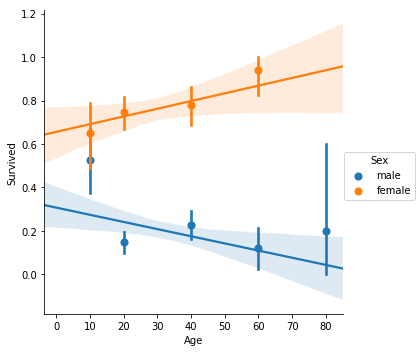

In [56]:
#what if relate gender and age with survival set
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)